# Wind Energy Analysis for P2
## Pollux GRONIER
## Datasets : Paris
### Date: [14/05/2025]

# 1 Study of your dataset

###  Load Data

#### Import libraries and load the datasets

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min
from windrose import WindroseAxes
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as mdates
from datetime import datetime

Paris= pd.read_csv('csv_Paris_48.85889_2.320041_fixed_23_180_PT30M.csv', parse_dates=['period_end'])

# Dictionary to store dataset
locations = {'Paris': Paris}

To be able to understand the dataset and do further analysis we need to see what colums and what info we can get. 

In [18]:
print("Paris columns:", Paris.columns.tolist())

Paris columns: ['air_temp', 'albedo', 'azimuth', 'clearsky_dhi', 'clearsky_dni', 'clearsky_ghi', 'clearsky_gti', 'cloud_opacity', 'dewpoint_temp', 'dhi', 'dni', 'ghi', 'gti', 'precipitable_water', 'precipitation_rate', 'relative_humidity', 'surface_pressure', 'snow_depth', 'snow_water_equivalent', 'snow_soiling_rooftop', 'snow_soiling_ground', 'wind_direction_100m', 'wind_direction_10m', 'wind_speed_100m', 'wind_speed_10m', 'zenith', 'period_end', 'period']


 After loading each DataFrame let's have a look at the datasets to see what were dealing with :

In [19]:
print("Paris sample:")
display(Paris.head())

Paris sample:


,air_temp,albedo,azimuth,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,dhi,...,snow_water_equivalent,snow_soiling_rooftop,snow_soiling_ground,wind_direction_100m,wind_direction_10m,wind_speed_100m,wind_speed_10m,zenith,period_end,period
0,6,0.14,-11,0,0,0,0,0.0,4.9,0,...,0.0,0,0,216,211,8.8,4.7,154,2014-01-01 00:30:00+00:00,PT30M
1,6,0.14,-26,0,0,0,0,0.0,4.8,0,...,0.0,0,0,216,210,8.7,4.5,152,2014-01-01 01:00:00+00:00,PT30M
2,6,0.14,-39,0,0,0,0,0.0,4.7,0,...,0.0,0,0,215,209,8.7,4.5,150,2014-01-01 01:30:00+00:00,PT30M
3,6,0.14,-50,0,0,0,0,0.0,4.6,0,...,0.0,0,0,213,207,8.8,4.6,146,2014-01-01 02:00:00+00:00,PT30M
4,6,0.14,-60,0,0,0,0,0.0,4.6,0,...,0.0,0,0,211,206,8.8,4.7,142,2014-01-01 02:30:00+00:00,PT30M


Is there any null values in the datasets?

In [20]:
print("Paris null counts:\n")
display(Paris.isnull().sum())

Paris null counts:



air_temp                 0
albedo                   0
azimuth                  0
clearsky_dhi             0
clearsky_dni             0
clearsky_ghi             0
clearsky_gti             0
cloud_opacity            0
dewpoint_temp            0
dhi                      0
dni                      0
ghi                      0
gti                      0
precipitable_water       0
precipitation_rate       0
relative_humidity        0
surface_pressure         0
snow_depth               0
snow_water_equivalent    0
snow_soiling_rooftop     0
snow_soiling_ground      0
wind_direction_100m      0
wind_direction_10m       0
wind_speed_100m          0
wind_speed_10m           0
zenith                   0
period_end               0
period                   0
dtype: int64

No null values, so we actually have pretty clean data, so very light processing


## Delete all non-wind-related and time-related features from your dataset

In [21]:
# wind data cleaning 
def clean_wind_data(df):
    #useful columns for wind data
    wind_cols = [
        'period_end',
        'wind_direction_10m',
        'wind_direction_100m',
        'wind_speed_10m',
        'wind_speed_100m'
    ]
    df_wind = df[wind_cols].copy()
    print(f"Paris wind data shape: {df_wind.shape}")
    print(f"Selected columns: {wind_cols}")
    return df_wind

# cleaning paris data
wind_data_paris = clean_wind_data(Paris)

print("\nCleaned wind data for Paris:")
display(wind_data_paris.head())

Paris wind data shape: (175344, 5)
Selected columns: ['period_end', 'wind_direction_10m', 'wind_direction_100m', 'wind_speed_10m', 'wind_speed_100m']

Cleaned wind data for Paris:


,period_end,wind_direction_10m,wind_direction_100m,wind_speed_10m,wind_speed_100m
0,2014-01-01 00:30:00+00:00,211,216,4.7,8.8
1,2014-01-01 01:00:00+00:00,210,216,4.5,8.7
2,2014-01-01 01:30:00+00:00,209,215,4.5,8.7
3,2014-01-01 02:00:00+00:00,207,213,4.6,8.8
4,2014-01-01 02:30:00+00:00,206,211,4.7,8.8


## Extract a sub-dataset corresponding to exactly one year

In [22]:
# Fonction pour extraire une année complète
def extract_year(df, year=2014):
    """
    Extrait les données pour une année spécifique.
    """
    df = df.set_index('period_end')
    year_data = df[f"{year}-01-01":f"{year}-12-31"]
    return year_data

# Extraction des données pour l'année 2014
annual_wind_data_paris = extract_year(wind_data_paris, year=2014)

print("\nSample of 2014 data for Paris:")
display(annual_wind_data_paris.head())



Sample of 2014 data for Paris:


,wind_direction_10m,wind_direction_100m,wind_speed_10m,wind_speed_100m
period_end,,,,
2014-01-01 00:30:00+00:00,211,216,4.7,8.8
2014-01-01 01:00:00+00:00,210,216,4.5,8.7
2014-01-01 01:30:00+00:00,209,215,4.5,8.7
2014-01-01 02:00:00+00:00,207,213,4.6,8.8
2014-01-01 02:30:00+00:00,206,211,4.7,8.8


## Plot the 4 wind-related features as a function of time spanning the whole year


### Distinclty compiled:

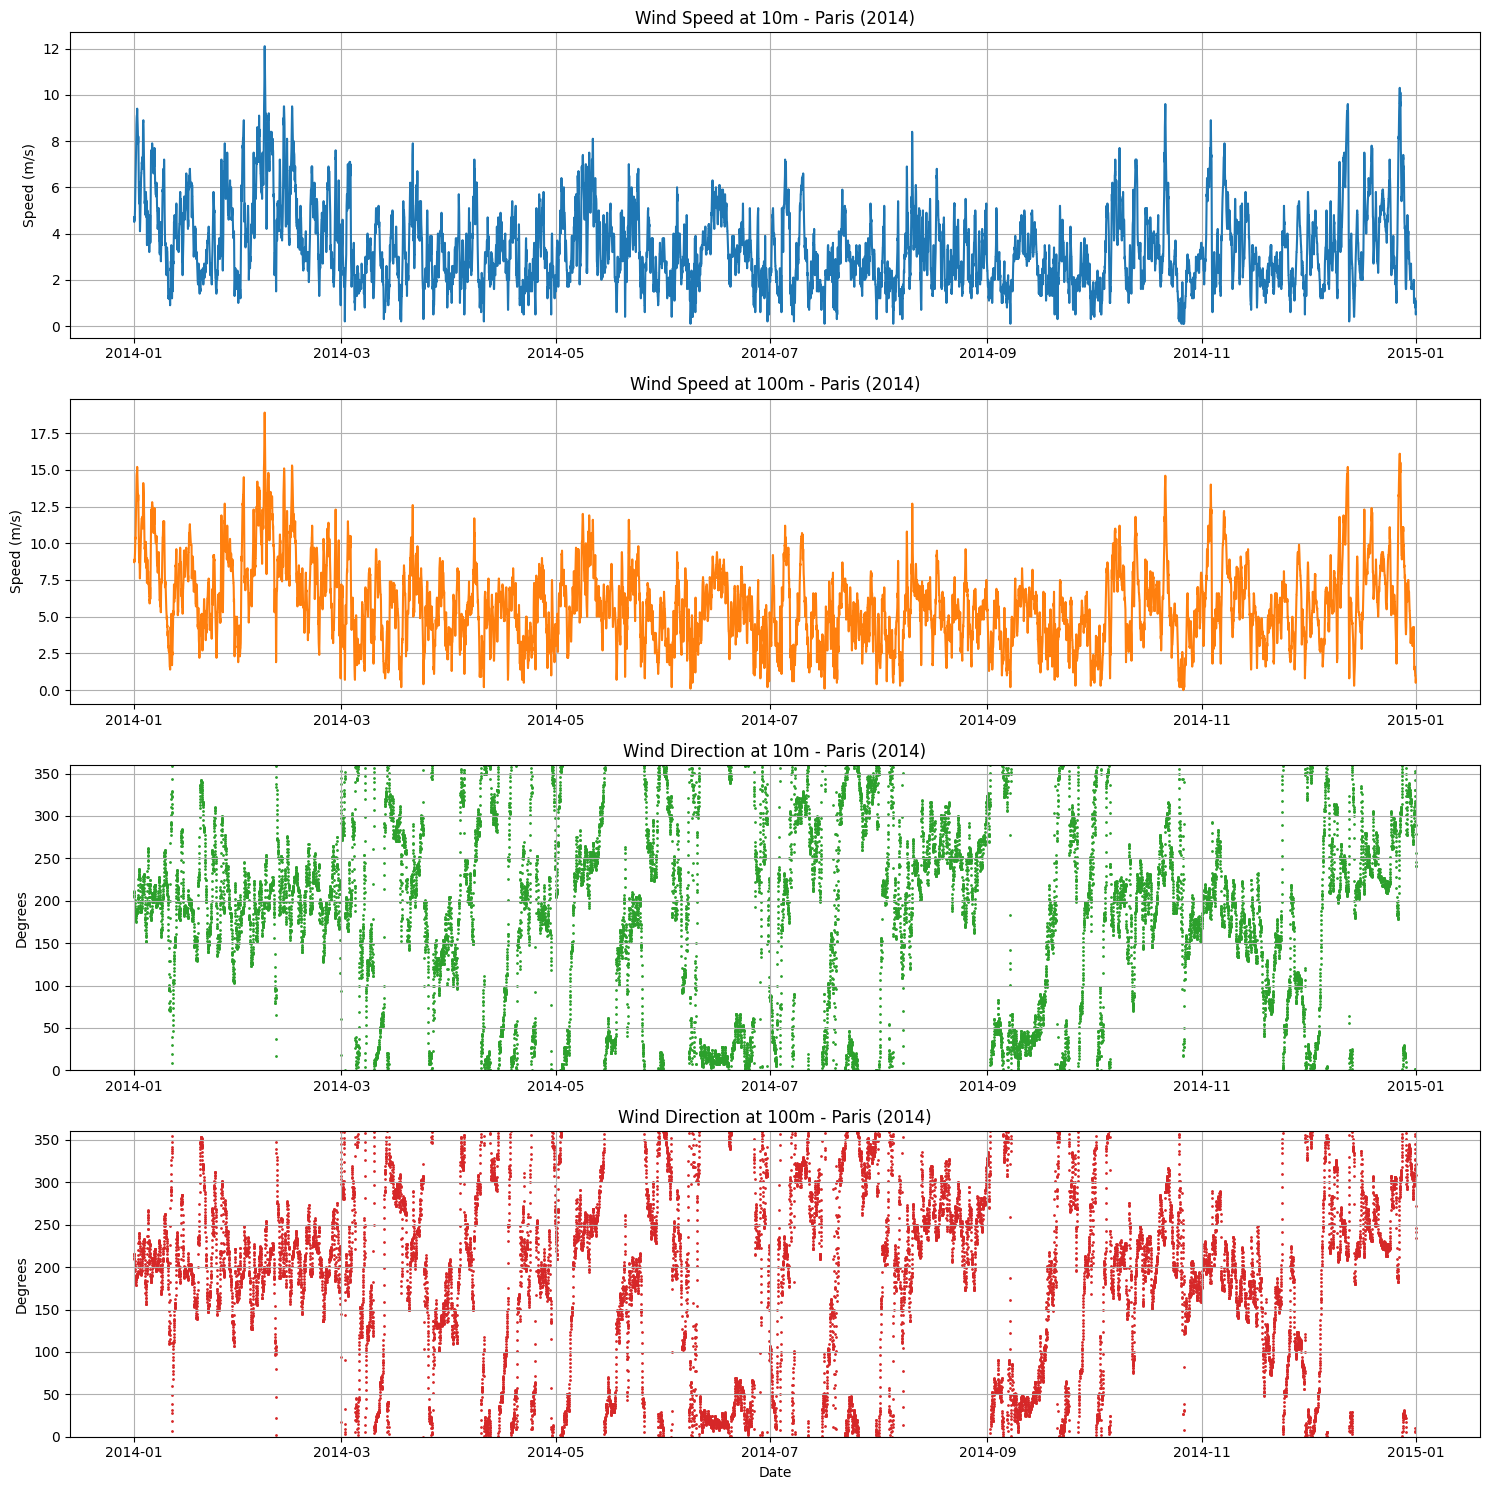

In [23]:
def plot_wind_features(df):
    """Affiche les quatre variables du vent pour l'année entière."""
    plt.figure(figsize=(15, 15))
    
    # Vitesse du vent à 10m
    plt.subplot(4, 1, 1)
    plt.plot(df.index, df['wind_speed_10m'], color='tab:blue')
    plt.title('Wind Speed at 10m - Paris (2014)')
    plt.ylabel('Speed (m/s)')
    plt.grid(True)
    
    # Vitesse du vent à 100m
    plt.subplot(4, 1, 2)
    plt.plot(df.index, df['wind_speed_100m'], color='tab:orange')
    plt.title('Wind Speed at 100m - Paris (2014)')
    plt.ylabel('Speed (m/s)')
    plt.grid(True)
    
    # Direction du vent à 10m
    plt.subplot(4, 1, 3)
    plt.scatter(df.index, df['wind_direction_10m'], s=1, color='tab:green')
    plt.title('Wind Direction at 10m - Paris (2014)')
    plt.ylabel('Degrees')
    plt.ylim(0, 360)
    plt.grid(True)
    
    # Direction du vent à 100m
    plt.subplot(4, 1, 4)
    plt.scatter(df.index, df['wind_direction_100m'], s=1, color='tab:red')
    plt.title('Wind Direction at 100m - Paris (2014)')
    plt.ylabel('Degrees')
    plt.xlabel('Date')
    plt.ylim(0, 360)
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_wind_features(annual_wind_data_paris)


### Wind Speeds 

Vertical gradient: Wind speed at 100 m is always higher than at 10 m, as expected due to less friction aloft.

Seasonal pattern: Wind speeds are higher in winter, lower in summer.

Variability: Paris shows moderate wind speeds (rarely above 12 m/s at 10 m, 17 m/s at 100 m) and moderate variability; extreme events are rare.

Spikes: Occasional sharp peaks indicate passing storms or weather fronts.


### Wind Directions 

Wind direction: Highly variable at both heights, covering almost all directions, with no persistent prevailing wind.

Vertical coherence: Directions at 10 m and 100 m generally match, but sometimes diverge due to urban turbulence.



### Key Takeaways for Wind Turbine Siting

100m wind is both stronger and more stable—turbines should be sited and oriented based on 100m data.

Frequent direction shifts especially in Paris  mean yaw systems (which turn the turbine into the wind) need to be responsive.

Periods of low wind (flat sections in the speed plot) correspond to highly erratic direction data, which is normal and should be filtered out when analyzing prevailing wind directions.


## Calculate the number of hours during which the wind was not blowing

### Calculate hours with no wind ( 0m/s )

In [24]:
def calculate_calm_hours(df, threshold=0):
    """Calcule le nombre d'heures où la vitesse du vent est inférieure ou égale au seuil (m/s)."""
    calm_intervals_10m = (df['wind_speed_10m'] <= threshold).sum()
    calm_intervals_100m = (df['wind_speed_100m'] <= threshold).sum()
    calm_hours_10m = calm_intervals_10m / 2  # chaque intervalle = 30 min
    calm_hours_100m = calm_intervals_100m / 2
    return {'10m': calm_hours_10m, '100m': calm_hours_100m}

# Exemple d'utilisation pour Paris en 2014
calm_hours_paris = calculate_calm_hours(annual_wind_data_paris)
print(f"Paris calm hours (windspeed = 0 m/s):")
print(f"  At 10m: {calm_hours_paris['10m']:.1f} hours")
print(f"  At 100m: {calm_hours_paris['100m']:.1f} hours")


Paris calm hours (windspeed = 0 m/s):
  At 10m: 0.0 hours
  At 100m: 0.5 hours


### Calculate hours with wind speed < 0.5 m/s 

In [25]:
def calculate_calm_hours(df, threshold=0.5):
    """Calcule le nombre d'heures où la vitesse du vent est inférieure ou égale au seuil (m/s)."""
    calm_intervals_10m = (df['wind_speed_10m'] <= threshold).sum()
    calm_intervals_100m = (df['wind_speed_100m'] <= threshold).sum()
    calm_hours_10m = calm_intervals_10m / 2  # chaque intervalle = 30 min
    calm_hours_100m = calm_intervals_100m / 2
    return {'10m': calm_hours_10m, '100m': calm_hours_100m}

# Exemple d'utilisation pour Paris en 2014
calm_hours_paris = calculate_calm_hours(annual_wind_data_paris)
print(f"Paris calm hours (windspeed = 0,5 m/s):")
print(f"  At 10m: {calm_hours_paris['10m']:.1f} hours")
print(f"  At 100m: {calm_hours_paris['100m']:.1f} hours")


Paris calm hours (windspeed = 0,5 m/s):
  At 10m: 65.5 hours
  At 100m: 35.5 hours


### Calculate hours with wind speed < 1 m/s (calm threshold)

In [26]:
def calculate_calm_hours(df, threshold=1):
    """Calcule le nombre d'heures où la vitesse du vent est inférieure ou égale au seuil (m/s)."""
    calm_intervals_10m = (df['wind_speed_10m'] <= threshold).sum()
    calm_intervals_100m = (df['wind_speed_100m'] <= threshold).sum()
    calm_hours_10m = calm_intervals_10m / 2  # chaque intervalle = 30 min
    calm_hours_100m = calm_intervals_100m / 2
    return {'10m': calm_hours_10m, '100m': calm_hours_100m}

# Exemple d'utilisation pour Paris en 2014
calm_hours_paris = calculate_calm_hours(annual_wind_data_paris)
print(f"Paris calm hours (windspeed = 1 m/s):")
print(f"  At 10m: {calm_hours_paris['10m']:.1f} hours")
print(f"  At 100m: {calm_hours_paris['100m']:.1f} hours")


Paris calm hours (windspeed = 1 m/s):
  At 10m: 300.0 hours
  At 100m: 137.0 hours


### Calculate hours with wind speed < 3 m/s (practical calm threshold)

In [27]:
def calculate_calm_hours(df, threshold=2):
    """Calcule le nombre d'heures où la vitesse du vent est inférieure ou égale au seuil (m/s)."""
    calm_intervals_10m = (df['wind_speed_10m'] <= threshold).sum()
    calm_intervals_100m = (df['wind_speed_100m'] <= threshold).sum()
    calm_hours_10m = calm_intervals_10m / 2  # chaque intervalle = 30 min
    calm_hours_100m = calm_intervals_100m / 2
    return {'10m': calm_hours_10m, '100m': calm_hours_100m}

# Exemple d'utilisation pour Paris en 2014
calm_hours_paris = calculate_calm_hours(annual_wind_data_paris)
print(f"Paris calm hours (windspeed = 2 m/s):")
print(f"  At 10m: {calm_hours_paris['10m']:.1f} hours")
print(f"  At 100m: {calm_hours_paris['100m']:.1f} hours")


Paris calm hours (windspeed = 2 m/s):
  At 10m: 2040.5 hours
  At 100m: 614.0 hours


## Plot the monthly-averaged wind-related features as a function of the number of the month

 Resample and plot

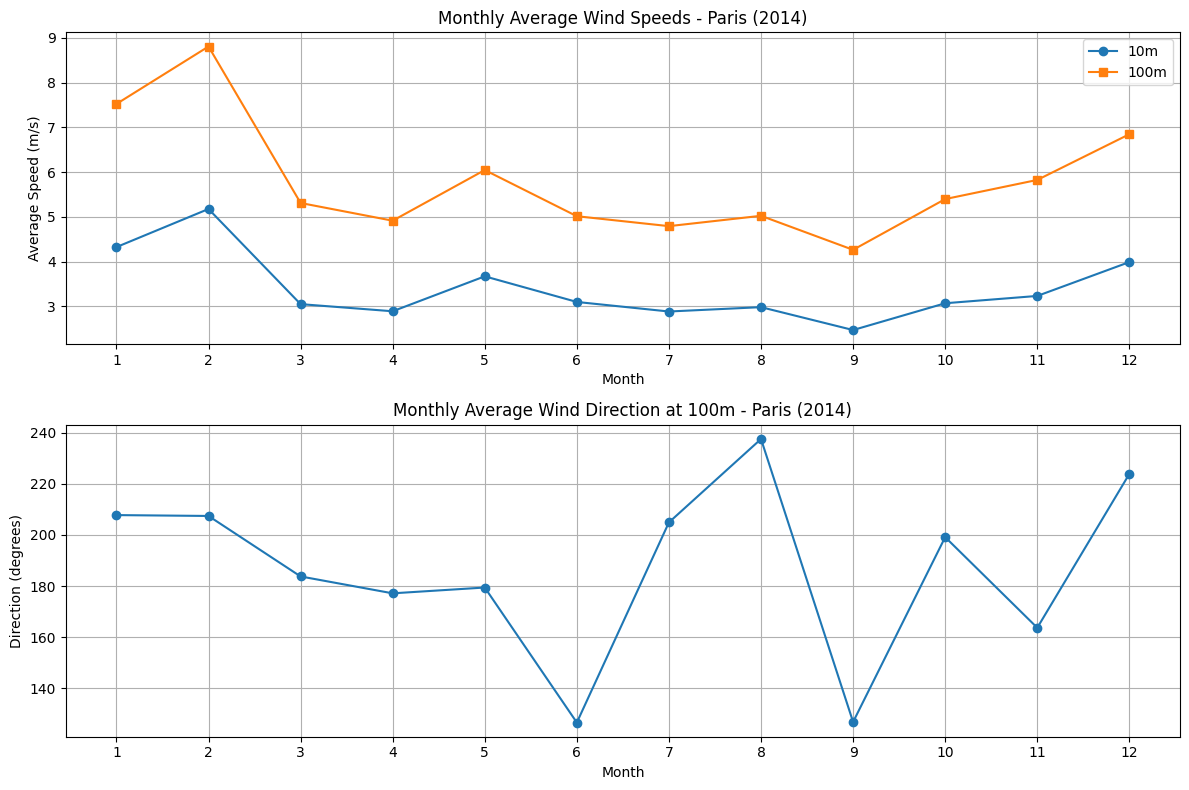

In [28]:
import matplotlib.pyplot as plt

def plot_monthly_averages_paris(df):
    """Calculate and plot monthly average wind features for Paris."""
    # Resample to monthly averages
    monthly_avg = df.resample('ME').mean()
    monthly_avg['month'] = monthly_avg.index.month

    plt.figure(figsize=(12, 8))

    # Plot wind speeds
    plt.subplot(2, 1, 1)
    plt.plot(monthly_avg['month'], monthly_avg['wind_speed_10m'], 'o-', label='10m')
    plt.plot(monthly_avg['month'], monthly_avg['wind_speed_100m'], 's-', label='100m')
    plt.title('Monthly Average Wind Speeds - Paris (2014)')
    plt.xlabel('Month')
    plt.ylabel('Average Speed (m/s)')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.legend()

    # Plot wind direction
    plt.subplot(2, 1, 2)
    plt.plot(monthly_avg['month'], monthly_avg['wind_direction_100m'], 'o-')
    plt.title('Monthly Average Wind Direction at 100m - Paris (2014)')
    plt.xlabel('Month')
    plt.ylabel('Direction (degrees)')
    plt.xticks(range(1, 13))
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Usage:
plot_monthly_averages_paris(annual_wind_data_paris)


## Plot the wind speed distribution at 10m and 100m above the ground
 Histograms for both heights

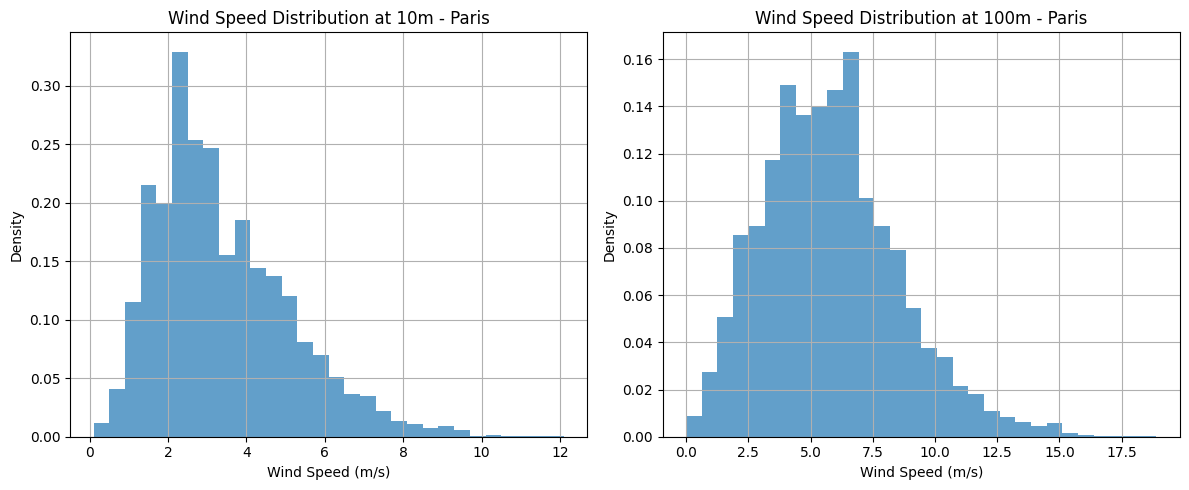

In [29]:
import matplotlib.pyplot as plt

def plot_wind_distribution_paris(df):
    """Plot wind speed distribution at 10m and 100m for Paris."""
    plt.figure(figsize=(12, 5))
    
    # Distribution à 10m
    plt.subplot(1, 2, 1)
    plt.hist(df['wind_speed_10m'], bins=30, alpha=0.7, density=True)
    plt.title('Wind Speed Distribution at 10m - Paris')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Density')
    plt.grid(True)
    
    # Distribution à 100m
    plt.subplot(1, 2, 2)
    plt.hist(df['wind_speed_100m'], bins=30, alpha=0.7, density=True)
    plt.title('Wind Speed Distribution at 100m - Paris')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Density')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Utilisation avec les données annuelles de Paris
plot_wind_distribution_paris(annual_wind_data_paris)


Distributions are right-skewed at 10m but become more normal at 100m, showing reduced surface turbulence effects at higher elevations.

## Find the parameters of the Weibull distribution that seems to fit best your data

Paris Best-fit Weibull parameters (shape k, scale A):
  10m: k (shape) = 2.12, A (scale) = 3.84
  100m: k (shape) = 2.25, A (scale) = 6.54


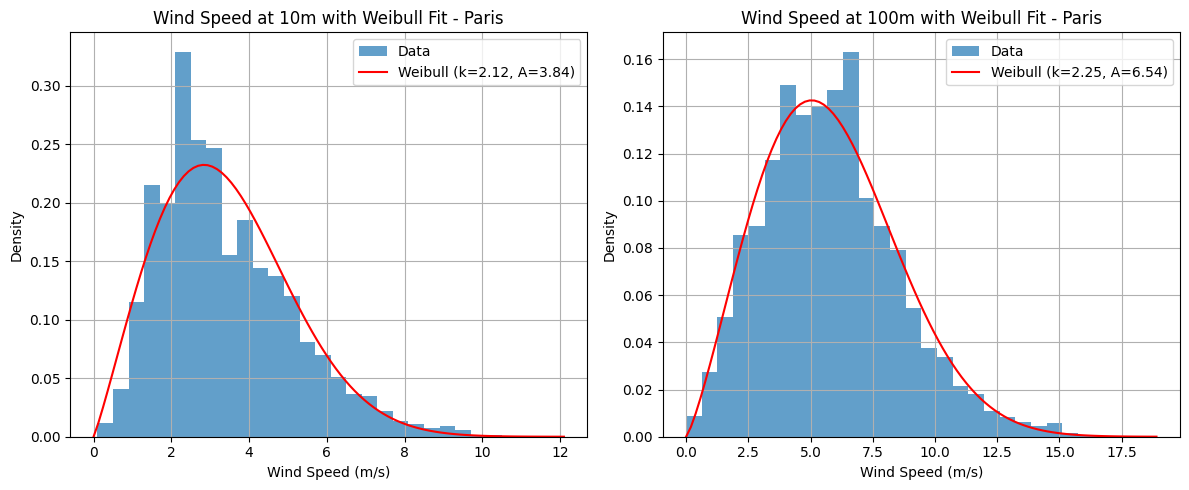

In [30]:
def fit_weibull_paris(df):
    """Fit Weibull distribution to Paris wind speed data and visualize fit"""
    # Fit Weibull to 10m data
    shape_10m, loc_10m, scale_10m = weibull_min.fit(df['wind_speed_10m'].dropna(), floc=0)
    
    # Fit Weibull to 100m data
    shape_100m, loc_100m, scale_100m = weibull_min.fit(df['wind_speed_100m'].dropna(), floc=0)
    
    # Print parameters
    print("Paris Best-fit Weibull parameters (shape k, scale A):")
    print(f"  10m: k (shape) = {shape_10m:.2f}, A (scale) = {scale_10m:.2f}")
    print(f"  100m: k (shape) = {shape_100m:.2f}, A (scale) = {scale_100m:.2f}")
    
    # Plot with fitted distribution
    plt.figure(figsize=(12, 5))
    
    # 10m data and fit
    plt.subplot(1, 2, 1)
    x = np.linspace(0, df['wind_speed_10m'].max(), 100)
    plt.hist(df['wind_speed_10m'], bins=30, density=True, alpha=0.7, label='Data')
    plt.plot(x, weibull_min.pdf(x, shape_10m, loc=0, scale=scale_10m), 'r-', 
             label=f'Weibull (k={shape_10m:.2f}, A={scale_10m:.2f})')
    plt.title('Wind Speed at 10m with Weibull Fit - Paris')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    
    # 100m data and fit
    plt.subplot(1, 2, 2)
    x = np.linspace(0, df['wind_speed_100m'].max(), 100)
    plt.hist(df['wind_speed_100m'], bins=30, density=True, alpha=0.7, label='Data')
    plt.plot(x, weibull_min.pdf(x, shape_100m, loc=0, scale=scale_100m), 'r-', 
             label=f'Weibull (k={shape_100m:.2f}, A={scale_100m:.2f})')
    plt.title('Wind Speed at 100m with Weibull Fit - Paris')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return {
        '10m': {'shape': shape_10m, 'scale': scale_10m},
        '100m': {'shape': shape_100m, 'scale': scale_100m}
    }
fit_weibull_params_paris = fit_weibull_paris(annual_wind_data_paris)


## what is the effect of the wind direction, and how should you take that into account when installing your wind turbine?

Rose plot implementation

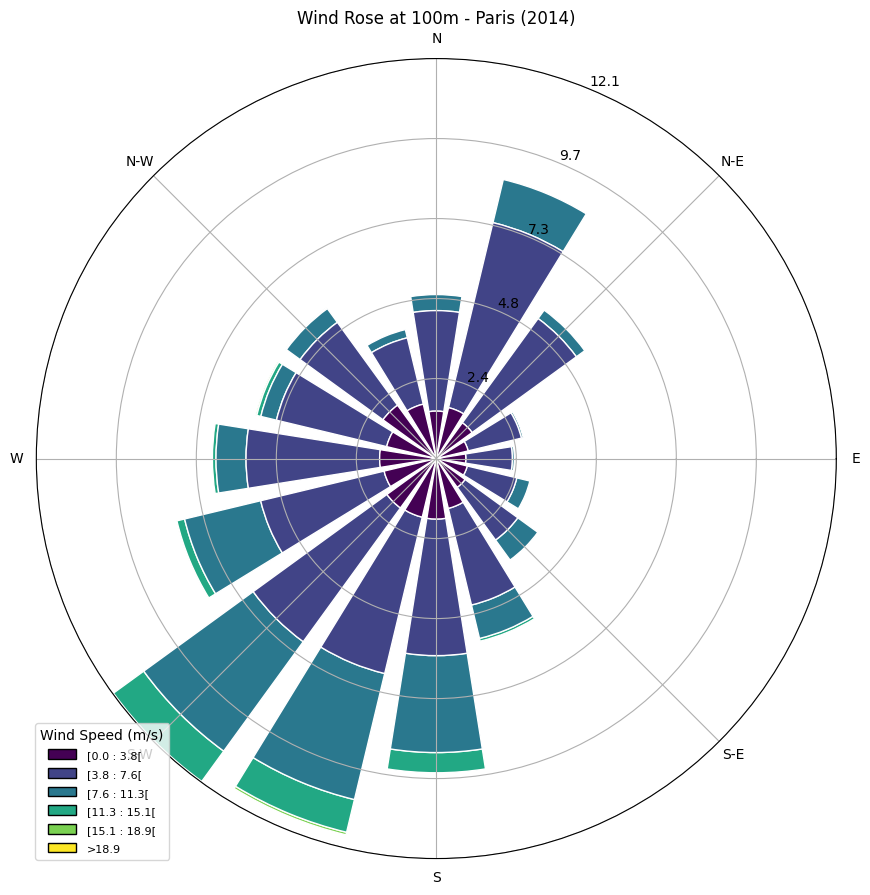

Paris dominant wind direction: SW
Percentage of time: 22.0%
Average speed in dominant direction: 6.9 m/s


In [31]:
def plot_wind_rose_paris(df):
    """Create wind rose diagram showing wind speed and direction for Paris at 100m"""
    fig = plt.figure(figsize=(10, 10))
    ax = WindroseAxes.from_ax(fig=fig)
    
    # Wind rose plot
    ax.bar(df['wind_direction_100m'], df['wind_speed_100m'], normed=True, 
           opening=0.8, edgecolor='white', nsector=16)
    
    ax.set_legend(title='Wind Speed (m/s)')
    plt.title('Wind Rose at 100m - Paris (2014)')
    plt.show()
    
    # Dominant direction analysis
    sector_size = 45  # 8 sectors (N, NE, E, ...)
    df['wind_sector'] = ((df['wind_direction_100m'] + sector_size/2) % 360) // sector_size
    sector_counts = df.groupby('wind_sector').size()
    sector_speeds = df.groupby('wind_sector')['wind_speed_100m'].mean()
    
    max_sector = sector_counts.idxmax()
    direction_names = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
    dominant_direction = direction_names[int(max_sector)]
    
    print(f"Paris dominant wind direction: {dominant_direction}")
    print(f"Percentage of time: {100 * sector_counts[max_sector] / len(df):.1f}%")
    print(f"Average speed in dominant direction: {sector_speeds[max_sector]:.1f} m/s")


plot_wind_rose_paris(annual_wind_data_paris)


The wind direction has a major impact on wind turbine performance because turbines generate the most power when facing the prevailing wind. In Paris, the dominant wind direction is southwest (SW), occurring 22% of the time with an average speed of 6.9 m/s.

How to take this into account for installation:

Orient the turbine so it faces SW, the prevailing wind direction, to maximize energy capture.

Site selection: Place the turbine in an open area with a clear fetch to the SW, avoiding obstacles (buildings, trees) that could cause turbulence or block the wind.

Yaw system: Use a responsive yaw system to adjust the turbine’s orientation, as wind direction in Paris can still vary significantly.



Distance from obstacles: Follow siting guidelines—ideally, install the turbine at least 10 times the height of any nearby obstacle away from that obstacle, or on a tower at least twice the obstacle’s height.